In [68]:
import numpy as np
import pandas as pd
import sklearn
import joblib
from stable_bloom_filter import stable_bloom_filter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [11]:
data = pd.read_csv("Dataset/e_shop_clothing_2008.csv",sep=";")
data.head()

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
0,2008,4,1,1,29,1,1,A13,1,5,1,28,2,1
1,2008,4,1,2,29,1,1,A16,1,6,1,33,2,1
2,2008,4,1,3,29,1,2,B4,10,2,1,52,1,1
3,2008,4,1,4,29,1,2,B17,6,6,2,38,2,1
4,2008,4,1,5,29,1,2,B8,4,3,2,52,1,1


In [45]:
data.rename(columns = {'page 1 (main category)':'category', 'page 2 (clothing model)':'model'}, inplace = True)
sel_cols=data[['category','model','colour']]
sel_cols.head()

,category,model,colour
0,1,A13,1
1,1,A16,1
2,2,B4,10
3,2,B17,6
4,2,B8,4


In [46]:
unq=sel_cols.drop_duplicates()
print(len(unq),len(sel_cols))

218 165474


This implies that the data is dense in terms of duplicates.

In [54]:
for u in sel_cols:
    print(u)

category
model
colour


In [62]:
duplicate=[]
unq_clicks={}
for index, row in sel_cols.iterrows():
    u=str(row['category'])+row['model']+str(row['colour'])
    try:
        unq_clicks[u]+=1
        duplicate.append(1)
    except KeyError:
        unq_clicks[u]=1
        duplicate.append(0)
sel_cols['is_duplicate']=duplicate

D:\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [63]:
sel_cols.head()

,category,model,colour,is_duplicate
0,1,A13,1,0
1,1,A16,1,0
2,2,B4,10,0
3,2,B17,6,0
4,2,B8,4,0


In [64]:
sel_cols.to_csv(r'Dataset/clickstream_is_duplicate.csv')
sel_cols

,category,model,colour,is_duplicate
0,1,A13,1,0
1,1,A16,1,0
2,2,B4,10,0
3,2,B17,6,0
4,2,B8,4,0
...,...,...,...,...
165469,2,B10,2,1
165470,1,A11,3,1
165471,1,A2,3,1
165472,3,C2,12,1


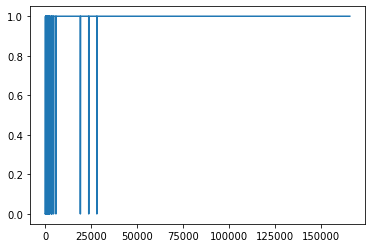

In [65]:
import matplotlib.pyplot as plt
plt.plot(sel_cols['is_duplicate'])
plt.show()

There is mostly duplicates after around 32500 insertions. We can also see that the uniques are condensed during the earlier insertions. That will always be the case even after shuffling the data since uniques are very less in number.

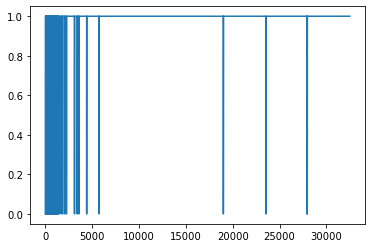

In [66]:
sel_cols_short=sel_cols[0:32500]
plt.plot(sel_cols_short['is_duplicate'])
plt.show()

In [69]:
X = sel_cols_short.loc[:, sel_cols_short.columns != 'is_duplicate']
y = sel_cols_short.loc[:, sel_cols_short.columns == 'is_duplicate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

ValueError: could not convert string to float: 'P7'